In [ ]:
pip install ipython-autotime

In [ ]:
#pip install ypstruct

In [ ]:
#pip install ypstruct
# pip install -U memory_profiler
# pip install ipython-autotime
%load_ext autotime
# %load_ext memory_profiler

time: 115 µs (started: 2021-11-08 04:52:12 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ypstruct import structure

In [ ]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from sklearn.model_selection import KFold
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from tensorflow import keras
import pickle 
import copy

In [ ]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/Genetic

/content/gdrive/MyDrive/Colab Notebooks/Genetic


In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./my_model",compile=False)

#load scaler
with open("my_scaler_x.pkl","rb") as f:
    loaded_scaler_x= pickle.load(f)

with open("my_scaler_y.pkl","rb") as f:
    loaded_scaler_y= pickle.load(f)

In [ ]:
# def sphere(x):
#     return sum(x**4)


def obfunc ( arr ):
    arr = np.array(arr)
    arr=arr[np.newaxis,:]
    X_scaled= loaded_scaler_x.transform(arr)    
    predicted_y= loaded_scaler_y.inverse_transform(reconstructed_model.predict(X_scaled))
    
    return predicted_y[0,0]

#example = [25, 30, 3.5,  7. ,  0.2, 25. , 15. , 30.]
#obfunc(example)


Problem Definition

In [ ]:
problem = structure()
problem.costfunc = obfunc
problem.nvar = 8
problem.varmin = [10, 25, 3, 1,  0.2, 23, 2, 15]
problem.varmax = [ 25, 45,  5.5,  5, 0.5, 26, 10, 30]

GA Parameters

In [ ]:
params = structure()
params.maxit = 100
params.npop = 50
params.beta = 1
params.pc = 1
params.gamma = 0.1
params.mu = 0.01
params.sigma = 0.1

Run GA

In [ ]:
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/Genetic/draft3.ipynb')
import got

In [ ]:
out = got.run(problem, params)

Iteration 0: Best Cost = 42234.46484375
Iteration 1: Best Cost = 42234.46484375
Iteration 2: Best Cost = 42234.46484375
Iteration 3: Best Cost = 40804.796875
Iteration 4: Best Cost = 38132.53125
Iteration 5: Best Cost = 38132.53125
Iteration 6: Best Cost = 36376.6015625
Iteration 7: Best Cost = 35164.81640625
Iteration 8: Best Cost = 33864.48046875
Iteration 9: Best Cost = 32833.01953125
Iteration 10: Best Cost = 32161.09375
Iteration 11: Best Cost = 32161.09375
Iteration 12: Best Cost = 32161.09375
Iteration 13: Best Cost = 31771.109375
Iteration 14: Best Cost = 31633.044921875
Iteration 15: Best Cost = 31633.044921875
Iteration 16: Best Cost = 31298.736328125
Iteration 17: Best Cost = 31269.96484375
Iteration 18: Best Cost = 31175.88671875
Iteration 19: Best Cost = 31175.88671875
Iteration 20: Best Cost = 31136.994140625
Iteration 21: Best Cost = 31098.05078125
Iteration 22: Best Cost = 30951.908203125
Iteration 23: Best Cost = 30951.908203125
Iteration 24: Best Cost = 30951.90820312

Results

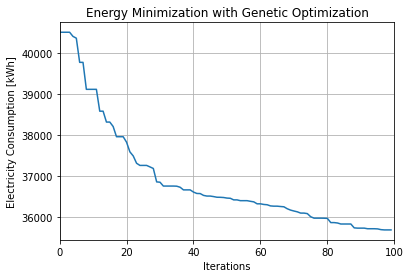

In [ ]:
 plt.plot(out.bestcost)
# plt.semilogy(out.bestcost)
plt.xlim(0, params.maxit)
plt.xlabel('Iterations')
plt.ylabel('Electricity Consumption [kWh]')
plt.title('Energy Minimization with Genetic Optimization')
plt.grid(True)
plt.show()

In [ ]:
out['bestsol']

struct({'position': array([13.90960614, 26.21833717,  5.49854207,  1.8460419 ,  0.20129617,
       23.49860489,  8.99824211, 16.71848376]), 'cost': 35696.887})

In [ ]:
popula = out.pop
#popula

In [ ]:
x, y= zip(*popula)

In [ ]:
arr =[]
arr2 = []
for x in popula:
  arr.append(x['position'])
  arr2.append(x['cost'])


In [ ]:
df = pd.DataFrame(arr)

In [ ]:
df['cost']=arr2

In [ ]:
df

,0,1,2,3,4,5,6,7,cost
0,13.909606,26.218337,5.498542,1.846042,0.201296,23.498605,8.998242,16.718484,35696.886719
1,13.910867,26.219827,5.498546,1.861725,0.201217,23.498218,8.998610,16.716892,35698.777344
2,13.910365,26.218615,5.498546,1.854654,0.203382,23.529755,8.998479,16.719572,35698.929688
3,13.916972,26.202290,5.498521,1.871310,0.201584,23.494481,9.001010,16.730470,35700.250000
4,13.910659,26.218444,5.498572,1.856681,0.203089,23.498630,8.999910,16.728519,35700.574219
5,13.909704,26.217961,5.498549,1.852967,0.204016,23.517006,8.999086,16.723707,35701.523438
6,13.910194,26.218392,5.498543,1.851560,0.204449,23.535063,8.999087,16.719698,35701.820312
7,13.915310,26.213203,5.498547,1.858705,0.203305,23.496515,8.999930,16.724464,35703.000000
8,13.917785,26.207593,5.498551,1.870743,0.202808,23.494089,8.998485,16.718364,35703.132812
9,13.910033,26.231654,5.498577,1.845002,0.203582,23.497287,9.000960,16.730618,35703.527344


In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,cost
0,1.000000,-0.200515,-0.302983,0.416110,-0.315663,-0.202258,-0.141264,-0.037077,0.406685
1,-0.200515,1.000000,0.326952,-0.173415,0.073898,0.103438,-0.162191,-0.234347,-0.028743
2,-0.302983,0.326952,1.000000,-0.305579,0.263873,0.043954,0.034398,0.003168,-0.188052
3,0.416110,-0.173415,-0.305579,1.000000,-0.642544,-0.271056,-0.143949,-0.087545,0.661284
4,-0.315663,0.073898,0.263873,-0.642544,1.000000,0.249880,0.320752,0.327810,-0.161087
5,-0.202258,0.103438,0.043954,-0.271056,0.249880,1.000000,-0.172174,-0.155838,-0.281212
6,-0.141264,-0.162191,0.034398,-0.143949,0.320752,-0.172174,1.000000,0.537830,0.078867
7,-0.037077,-0.234347,0.003168,-0.087545,0.327810,-0.155838,0.537830,1.000000,0.227622
cost,0.406685,-0.028743,-0.188052,0.661284,-0.161087,-0.281212,0.078867,0.227622,1.000000


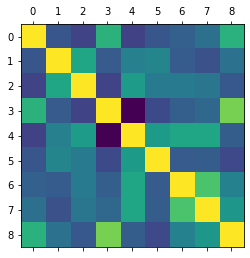

In [ ]:
plt.matshow(df.corr())

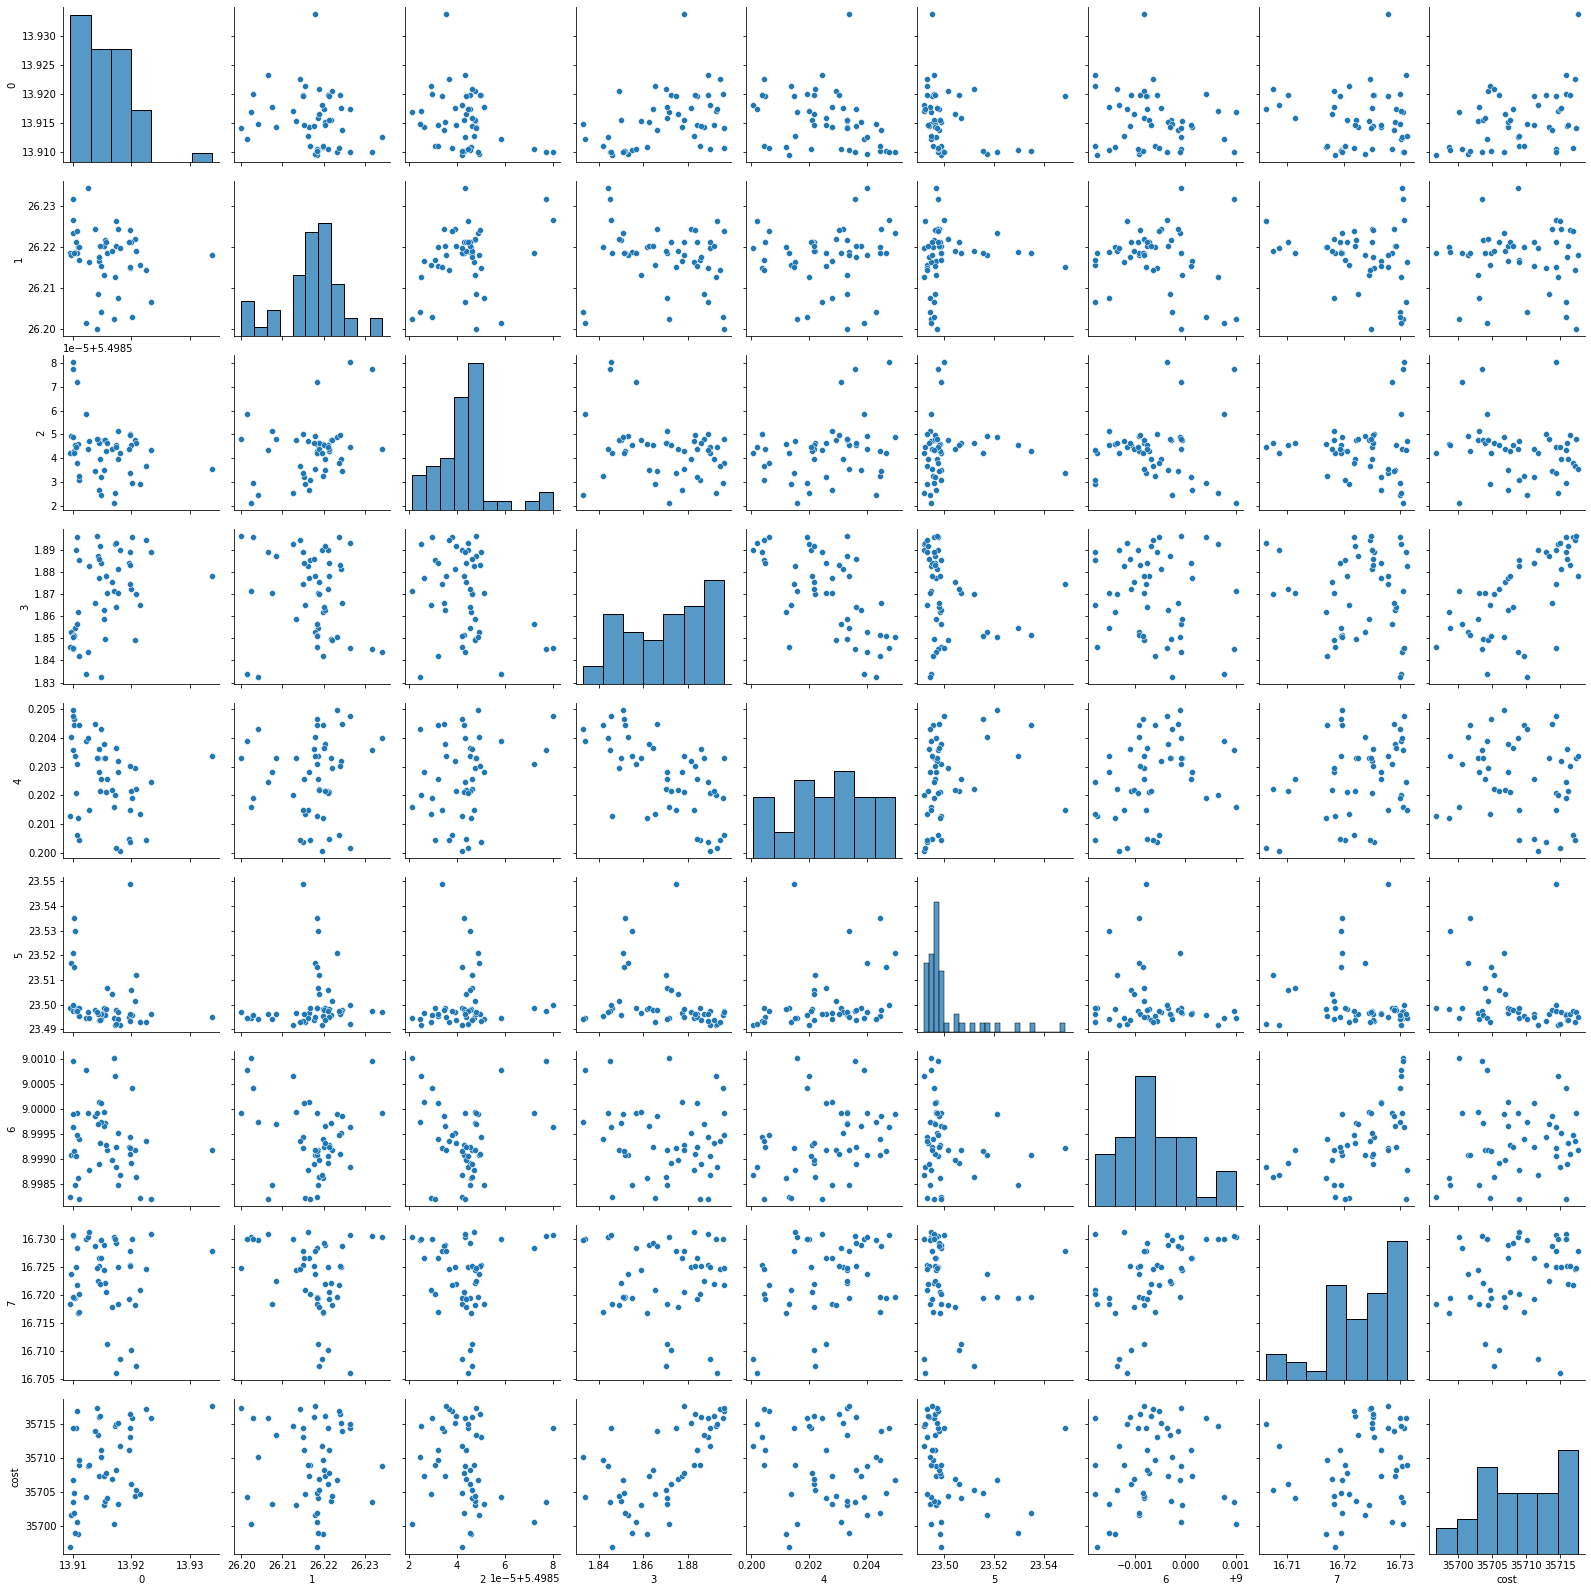

In [ ]:
import seaborn as sns
sns.pairplot(df)